In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv

In [9]:
def csvBreaks(df):
    previousFile = 0
    allBreaks = []
    for index, row in df.iterrows():
        currentFile = row['DataFileNumber']
        if not (currentFile == previousFile):
            allBreaks.append(row['Time'])
        previousFile = currentFile
    return allBreaks

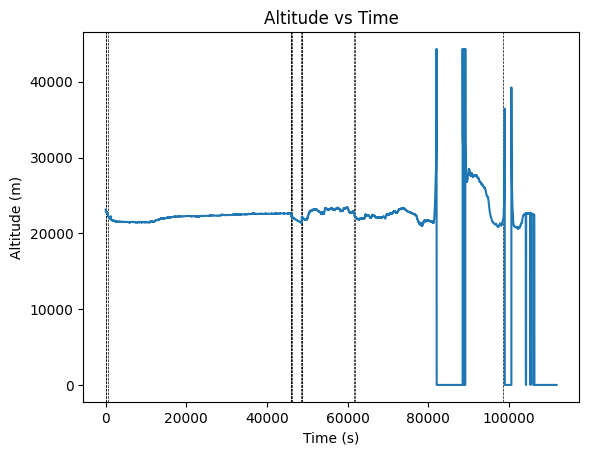

In [22]:
df = pd.read_csv('../data/modified/formattedData.csv')

for b in csvBreaks(df):
	plt.axvline(x=b, color='black', ls='--',lw=0.5)

plt.plot(df['Time'], df['Altitude'])
plt.title('Altitude vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.savefig('../results/plots/altitude_vs_time.png')
plt.show()

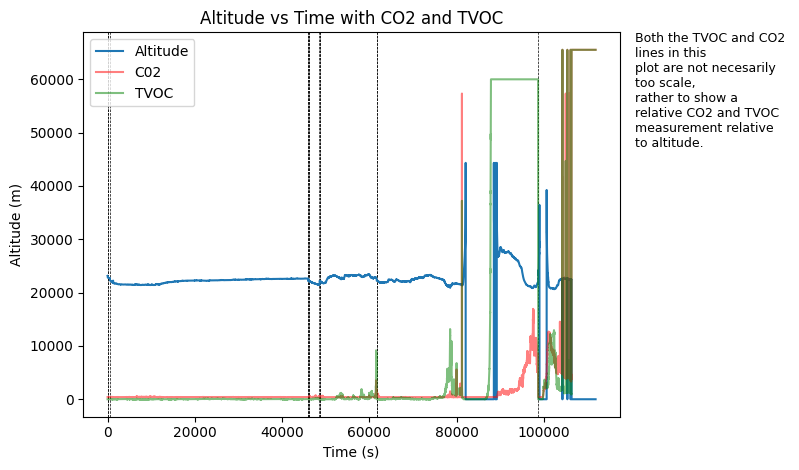

In [62]:
df = pd.read_csv('../data/modified/formattedData.csv')

for b in csvBreaks(df):
    plt.axvline(x=b, color='black', ls='--',lw=0.5)

plt.plot(df['Time'], df['Altitude'],label="Altitude")
plt.plot(df['Time'],df['CO2 equivelent'],alpha=0.5,color='r',label='C02')
plt.plot(df['Time'],df['TVOC'],alpha=0.5,color='g',label='TVOC')
plt.title('Altitude vs Time with CO2 and TVOC')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.legend()

plt.figtext(
    x=1,
    y=0.8,
    s='Both the TVOC and CO2 \nlines in this \nplot are not necesarily\ntoo scale,\nrather to show a \nrelative CO2 and TVOC \nmeasurement relative \nto altitude.',
    fontsize=9,
    color='black',
    ha='left', 
    va='center'  
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('../results/plots/Altitude_vs_Time_with_CO2_and_TVOC', bbox_inches='tight')
plt.show()